## Data Science Project
### Name: Sneha Sanjaykumar Bhaskar
### Roll no. : 2237070
### Project Name  : Whatsapp Chat Sentiment Analysis

### Preprocessing

In [1]:
import re # regular expressions
import pandas as pd
import numpy as np

#### Accessing file using file handing methods of python 

In [2]:
f=open('WhatsApp Chat with TE AI&DS (22-23).txt','r',encoding='utf-8') # reading file using file handling

In [3]:
data= f.read() # reading data

In [4]:
print(data) # printing the data

15/07/22, 11:14 - Dinesh Zende VP created group "TE AI&DS (22-23)"
15/07/22, 11:14 - You were added
23/09/22, 15:28 - Shendage Sir: <Media omitted>
23/09/22, 15:28 - Shendage Sir: Those who are interested  plz subject your application form today itself
25/09/22, 14:42 - Arvind Jagtap VP: *Greetings from Sandip University*

Sandip University, School of Computer Science and Engineering in Nashik (MH) in association ESDS, Software Solutions Limited, Nashik is organizing SUNHACKS-2022 a *International Level Hackathon* to give deserving students a platform to enhance and build something bigger than themselves. SUNHACKS aims to provide all the technical enthusiasts a boost by providing them with the best and most comfortable assets in the form of a 36-hour hackathon which would challenge their minds to spark and enlighten their way to innovations.
Participants can build their projects on 4 themes-
 1. Web/Mobile App development
 2. FinTech
 3. Machine learning /Artificial Intelligence
 4. He

In [5]:
# pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s' # message format
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages=re.split(pattern,data)[1:] # splitting messages from datetime
messages

['Dinesh Zende VP created group "TE AI&DS (22-23)"\n',
 'You were added\n',
 'Shendage Sir: <Media omitted>\n',
 'Shendage Sir: Those who are interested  plz subject your application form today itself\n',
 'Arvind Jagtap VP: *Greetings from Sandip University*\n\nSandip University, School of Computer Science and Engineering in Nashik (MH) in association ESDS, Software Solutions Limited, Nashik is organizing SUNHACKS-2022 a *International Level Hackathon* to give deserving students a platform to enhance and build something bigger than themselves. SUNHACKS aims to provide all the technical enthusiasts a boost by providing them with the best and most comfortable assets in the form of a 36-hour hackathon which would challenge their minds to spark and enlighten their way to innovations.\nParticipants can build their projects on 4 themes-\n 1. Web/Mobile App development\n 2. FinTech\n 3. Machine learning /Artificial Intelligence\n 4. HealthTech\nDates: 10th -12th November 2022\nVenue: Sandip 

In [7]:
len(messages)


542

In [8]:
dates=re.findall(pattern,data)
dates

['15/07/22, 11:14 - ',
 '15/07/22, 11:14 - ',
 '23/09/22, 15:28 - ',
 '23/09/22, 15:28 - ',
 '25/09/22, 14:42 - ',
 '25/09/22, 14:42 - ',
 '26/09/22, 16:17 - ',
 '27/09/22, 13:24 - ',
 '27/09/22, 13:25 - ',
 '30/09/22, 14:28 - ',
 '30/09/22, 14:29 - ',
 '05/10/22, 20:11 - ',
 '07/10/22, 10:11 - ',
 '07/10/22, 10:11 - ',
 '11/10/22, 16:11 - ',
 '11/10/22, 17:55 - ',
 '12/10/22, 12:30 - ',
 '12/10/22, 12:30 - ',
 '12/10/22, 12:31 - ',
 '12/10/22, 15:29 - ',
 '13/10/22, 10:22 - ',
 '13/10/22, 10:22 - ',
 '14/10/22, 13:32 - ',
 '14/10/22, 18:07 - ',
 '18/10/22, 12:36 - ',
 '19/10/22, 09:33 - ',
 '19/10/22, 11:52 - ',
 '19/10/22, 11:54 - ',
 '19/10/22, 15:19 - ',
 '22/10/22, 09:40 - ',
 '24/10/22, 20:40 - ',
 '26/10/22, 12:42 - ',
 '26/10/22, 13:15 - ',
 '26/10/22, 20:33 - ',
 '29/10/22, 12:24 - ',
 '29/10/22, 12:26 - ',
 '30/10/22, 23:05 - ',
 '31/10/22, 12:07 - ',
 '01/11/22, 10:23 - ',
 '01/11/22, 10:23 - ',
 '01/11/22, 10:36 - ',
 '01/11/22, 10:36 - ',
 '02/11/22, 09:28 - ',
 '02/11/22,

#### Coverting datetime in appropiate format

In [9]:
from datetime import datetime


In [10]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
    # convert message_date type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_message  542 non-null    object
 1   message_date  542 non-null    object
dtypes: object(2)
memory usage: 8.6+ KB


In [12]:

df['message_date'] = pd.to_datetime(df['message_date'], format="%d/%m/%y, %H:%M - ")

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,"Dinesh Zende VP created group ""TE AI&DS (22-23...",2022-07-15 11:14:00
1,You were added\n,2022-07-15 11:14:00
2,Shendage Sir: <Media omitted>\n,2022-09-23 15:28:00
3,Shendage Sir: Those who are interested plz su...,2022-09-23 15:28:00
4,Arvind Jagtap VP: *Greetings from Sandip Unive...,2022-09-25 14:42:00


In [13]:
df.shape

(542, 2)

#### Converting text file into pandas dataframe 

In [14]:
 users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

,date,user,message
0,2022-07-15 11:14:00,group_notification,"Dinesh Zende VP created group ""TE AI&DS (22-23..."
1,2022-07-15 11:14:00,group_notification,You were added\n
2,2022-09-23 15:28:00,Shendage Sir,<Media omitted>\n
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...


In [15]:
df['date']

0     2022-07-15 11:14:00
1     2022-07-15 11:14:00
2     2022-09-23 15:28:00
3     2022-09-23 15:28:00
4     2022-09-25 14:42:00
              ...        
537   2023-04-26 14:00:00
538   2023-04-26 14:00:00
539   2023-04-26 15:06:00
540   2023-04-26 15:54:00
541   2023-04-26 22:13:00
Name: date, Length: 542, dtype: datetime64[ns]

In [16]:
df['year']=df['date'].dt.year
df.head()

,date,user,message,year
0,2022-07-15 11:14:00,group_notification,"Dinesh Zende VP created group ""TE AI&DS (22-23...",2022
1,2022-07-15 11:14:00,group_notification,You were added\n,2022
2,2022-09-23 15:28:00,Shendage Sir,<Media omitted>\n,2022
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...,2022
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...,2022


In [17]:
df['month']=df['date'].dt.month_name()
df.head()

,date,user,message,year,month
0,2022-07-15 11:14:00,group_notification,"Dinesh Zende VP created group ""TE AI&DS (22-23...",2022,July
1,2022-07-15 11:14:00,group_notification,You were added\n,2022,July
2,2022-09-23 15:28:00,Shendage Sir,<Media omitted>\n,2022,September
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...,2022,September
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...,2022,September


In [18]:
df['day']=df['date'].dt.day



In [19]:
df['hour']=df['date'].dt.hour

In [20]:
df['minute']=df['date'].dt.minute

In [21]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-07-15 11:14:00,group_notification,"Dinesh Zende VP created group ""TE AI&DS (22-23...",2022,July,15,11,14
1,2022-07-15 11:14:00,group_notification,You were added\n,2022,July,15,11,14
2,2022-09-23 15:28:00,Shendage Sir,<Media omitted>\n,2022,September,23,15,28
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...,2022,September,23,15,28
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...,2022,September,25,14,42


#### Accesing total number of messages and total number of words

In [22]:
df[df['user']=='Arvind Jagtap VP'].shape #accessing particular user's messages

(73, 8)

In [23]:
df['user']
len(df['user']) # total number of messages

542

In [24]:
words=[]
for message in df['message']:
    
    print(message.split())

['Dinesh', 'Zende', 'VP', 'created', 'group', '"TE', 'AI&DS', '(22-23)"']
['You', 'were', 'added']
['<Media', 'omitted>']
['Those', 'who', 'are', 'interested', 'plz', 'subject', 'your', 'application', 'form', 'today', 'itself']
['*Greetings', 'from', 'Sandip', 'University*', 'Sandip', 'University,', 'School', 'of', 'Computer', 'Science', 'and', 'Engineering', 'in', 'Nashik', '(MH)', 'in', 'association', 'ESDS,', 'Software', 'Solutions', 'Limited,', 'Nashik', 'is', 'organizing', 'SUNHACKS-2022', 'a', '*International', 'Level', 'Hackathon*', 'to', 'give', 'deserving', 'students', 'a', 'platform', 'to', 'enhance', 'and', 'build', 'something', 'bigger', 'than', 'themselves.', 'SUNHACKS', 'aims', 'to', 'provide', 'all', 'the', 'technical', 'enthusiasts', 'a', 'boost', 'by', 'providing', 'them', 'with', 'the', 'best', 'and', 'most', 'comfortable', 'assets', 'in', 'the', 'form', 'of', 'a', '36-hour', 'hackathon', 'which', 'would', 'challenge', 'their', 'minds', 'to', 'spark', 'and', 'enlighte

In [25]:
words=[]
for message in df['message']:
    
    words.extend(message.split())

In [26]:
len(words) # total no of words typed by all group members

11735

In [27]:
df[df['message']=='<Media omitted>\n'].shape[0] # total media omitted

100

#### Accessing links in chats

In [28]:
!pip install urlextract

In [29]:
from urlextract import URLExtract
extractor=URLExtract()


In [30]:
links=[]
for message in df['message']:
    print(extractor.find_urls(message))

[]
[]
[]
[]
['https://sites.google.com/sandipuniversity.edu.in/sunhacks-2022/home']
[]
['https://www.crowdcast.io/e/ec-council-academia-8']
[]
['https://chat.whatsapp.com/Ja0n0gnmVxe5Rkyn95rb0T']
[]
[]
[]
['https://forms.gle/agXL4UX7e72aYyaGA']
[]
[]
['https://forms.office.com/Pages/ResponsePage.aspx?id=zepLH6q3skmqobhSXLJX4Cht5dPZxSBGvNeDbKMCcL9UMThMOTgyRE83OUNXNDU3TU43R0U0VTdDUC4u']
[]
[]
[]
[]
['https://forms.gle/MDrHuf6VaJqhsLJD9', 'https://chat.whatsapp.com/LA2PLuC4pIbKh3VgDE8Pyp']
[]
[]
[]
['www.abc.gov.in']
[]
['https://elearning.iirs.gov.in/edusatregistration/student']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://play.google.com/store/apps/details?id=com.apglobale.yinforchange']
[]
['https://play.google.com/store/apps/details?id=com.apglobale.yinforchange']
[]
[]
['https://internship.aicte-india.org/register_new.php']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://zoom.us/j/93351593686?pwd=cUF4TEZ1YVBLK1NMUjhtaE1FTFI2dz09']
[]
[]
[]
['https://forms.gl

In [31]:
links=[]
for message in df['message']:
    
    links.extend(extractor.find_urls(message))
    

In [32]:
len(links)

112

In [33]:
print(links)

['https://sites.google.com/sandipuniversity.edu.in/sunhacks-2022/home', 'https://www.crowdcast.io/e/ec-council-academia-8', 'https://chat.whatsapp.com/Ja0n0gnmVxe5Rkyn95rb0T', 'https://forms.gle/agXL4UX7e72aYyaGA', 'https://forms.office.com/Pages/ResponsePage.aspx?id=zepLH6q3skmqobhSXLJX4Cht5dPZxSBGvNeDbKMCcL9UMThMOTgyRE83OUNXNDU3TU43R0U0VTdDUC4u', 'https://forms.gle/MDrHuf6VaJqhsLJD9', 'https://chat.whatsapp.com/LA2PLuC4pIbKh3VgDE8Pyp', 'www.abc.gov.in', 'https://elearning.iirs.gov.in/edusatregistration/student', 'https://play.google.com/store/apps/details?id=com.apglobale.yinforchange', 'https://play.google.com/store/apps/details?id=com.apglobale.yinforchange', 'https://internship.aicte-india.org/register_new.php', 'https://zoom.us/j/93351593686?pwd=cUF4TEZ1YVBLK1NMUjhtaE1FTFI2dz09', 'https://forms.gle/MdQshUWdkyptQz56A', 'https://lnkd.in/gWERrbt', 'https://www.goldmansachs.com/careers/students/programs/india/engineers-campus-hiring-program.html', 'https://zoom.us/j/93351593686?pwd=c

In [34]:
df

,date,user,message,year,month,day,hour,minute
0,2022-07-15 11:14:00,group_notification,"Dinesh Zende VP created group ""TE AI&DS (22-23...",2022,July,15,11,14
1,2022-07-15 11:14:00,group_notification,You were added\n,2022,July,15,11,14
2,2022-09-23 15:28:00,Shendage Sir,<Media omitted>\n,2022,September,23,15,28
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...,2022,September,23,15,28
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...,2022,September,25,14,42
...,...,...,...,...,...,...,...,...
537,2023-04-26 14:00:00,Ghorpade Sir,https://easyshiksha.com/online_courses/interns...,2023,April,26,14,0
538,2023-04-26 14:00:00,Ghorpade Sir,https://caddeskindia.com/online-training/cours...,2023,April,26,14,0
539,2023-04-26 15:06:00,Rohini Naik Ma'am,"Dear Students,\n\nAudit Course 6 Quiz has been...",2023,April,26,15,6
540,2023-04-26 15:54:00,Ghorpade Sir,<Media omitted>\n,2023,April,26,15,54


#### Most busy users

In [35]:
x=df['user'].value_counts().head()

In [36]:
x

Ghorpade Sir          131
Shendage Sir          128
Arvind Jagtap VP       73
Rohini Naik Ma'am      66
group_notification     56
Name: user, dtype: int64

In [37]:
import matplotlib.pyplot as plt

In [38]:
name=x.index
count=x.values

<function matplotlib.pyplot.show(close=None, block=None)>

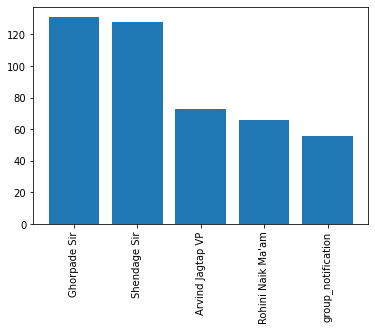

In [39]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show

In [40]:
df['user'].value_counts() # message count of all users

Ghorpade Sir            131
Shendage Sir            128
Arvind Jagtap VP         73
Rohini Naik Ma'am        66
group_notification       56
Padulkar Sir             35
Anish Date               16
Vijayraje Jadhav          7
Hrushikesh Kharade        3
Shivanjali Nimbalkar      2
Rishi Nashikkar           2
+91 77759 13775           2
Sahil Shah VP             2
Abhishek Raut             2
+91 81491 70456           2
Snehal Jagtap             1
Muskan Pathan             1
+91 81779 49515           1
Aniket Patil              1
+91 91722 42148           1
Shubham Gaikwad           1
Gaurav Jagtap             1
Vishakha Jagtap           1
Shivaay Sutar             1
Suyog Pawar               1
+91 72188 24969           1
Avdhoot Kumbhar           1
Atharva Gosavi            1
+91 75072 61969           1
Deepak Sonwane VP         1
Name: user, dtype: int64

In [41]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index() # percentage of each user

,index,user
0,Ghorpade Sir,24.17
1,Shendage Sir,23.62
2,Arvind Jagtap VP,13.47
3,Rohini Naik Ma'am,12.18
4,group_notification,10.33
5,Padulkar Sir,6.46
6,Anish Date,2.95
7,Vijayraje Jadhav,1.29
8,Hrushikesh Kharade,0.55
9,Shivanjali Nimbalkar,0.37


In [42]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percentage'}) # percentage of each user

,name,percentage
0,Ghorpade Sir,24.17
1,Shendage Sir,23.62
2,Arvind Jagtap VP,13.47
3,Rohini Naik Ma'am,12.18
4,group_notification,10.33
5,Padulkar Sir,6.46
6,Anish Date,2.95
7,Vijayraje Jadhav,1.29
8,Hrushikesh Kharade,0.55
9,Shivanjali Nimbalkar,0.37


### Data wrangling

In [43]:
df['message'] = df['message'].str.replace('<Media omitted>\n', '')

In [44]:
df['message']

0      Dinesh Zende VP created group "TE AI&DS (22-23...
1                                       You were added\n
2                                                       
3      Those who are interested  plz subject your app...
4       *Greetings from Sandip University*\n\nSandip ...
                             ...                        
537    https://easyshiksha.com/online_courses/interns...
538    https://caddeskindia.com/online-training/cours...
539    Dear Students,\n\nAudit Course 6 Quiz has been...
540                                                     
541    https://register.gotowebinar.com/register/8955...
Name: message, Length: 542, dtype: object

In [45]:
words=[]
for message in df['message']:
    
    words.extend(message.split())

In [46]:
df[df['user']=='group_notification']

,date,user,message,year,month,day,hour,minute
0,2022-07-15 11:14:00,group_notification,"Dinesh Zende VP created group ""TE AI&DS (22-23...",2022,July,15,11,14
1,2022-07-15 11:14:00,group_notification,You were added\n,2022,July,15,11,14
11,2022-10-05 20:11:00,group_notification,Your security code with Pratyush Jalkote chang...,2022,October,5,20,11
14,2022-10-11 16:11:00,group_notification,Your security code with Pratyush Jalkote chang...,2022,October,11,16,11
19,2022-10-12 15:29:00,group_notification,Your security code with Pratyush Jalkote chang...,2022,October,12,15,29
28,2022-10-19 15:19:00,group_notification,Your security code with Vishakha Jagtap change...,2022,October,19,15,19
31,2022-10-26 12:42:00,group_notification,Your security code with Pratyush Jalkote chang...,2022,October,26,12,42
32,2022-10-26 13:15:00,group_notification,Your security code with Aniket Patil changed. ...,2022,October,26,13,15
33,2022-10-26 20:33:00,group_notification,Your security code with Shubham Keskar changed...,2022,October,26,20,33
34,2022-10-29 12:24:00,group_notification,Your security code with Shubham Keskar changed...,2022,October,29,12,24


In [47]:
df[df['user']!='group_notification']

,date,user,message,year,month,day,hour,minute
2,2022-09-23 15:28:00,Shendage Sir,,2022,September,23,15,28
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...,2022,September,23,15,28
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...,2022,September,25,14,42
5,2022-09-25 14:42:00,Arvind Jagtap VP,,2022,September,25,14,42
6,2022-09-26 16:17:00,Arvind Jagtap VP,*Greetings from EC-Council !* \n*Join us for ...,2022,September,26,16,17
...,...,...,...,...,...,...,...,...
537,2023-04-26 14:00:00,Ghorpade Sir,https://easyshiksha.com/online_courses/interns...,2023,April,26,14,0
538,2023-04-26 14:00:00,Ghorpade Sir,https://caddeskindia.com/online-training/cours...,2023,April,26,14,0
539,2023-04-26 15:06:00,Rohini Naik Ma'am,"Dear Students,\n\nAudit Course 6 Quiz has been...",2023,April,26,15,6
540,2023-04-26 15:54:00,Ghorpade Sir,,2023,April,26,15,54


In [48]:
temp=df[df['user']!='group_notification']
# temp=temp[temp['message']!='<Media omitted>\n']
temp=temp[temp['message']!='']
temp


,date,user,message,year,month,day,hour,minute
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...,2022,September,23,15,28
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...,2022,September,25,14,42
6,2022-09-26 16:17:00,Arvind Jagtap VP,*Greetings from EC-Council !* \n*Join us for ...,2022,September,26,16,17
7,2022-09-27 13:24:00,Rohini Naik Ma'am,Samiksha Pawar\nVedant Kulkarni\nSujay Shinde\...,2022,September,27,13,24
8,2022-09-27 13:25:00,Shendage Sir,Follow this link to join my WhatsApp group ht...,2022,September,27,13,25
...,...,...,...,...,...,...,...,...
536,2023-04-26 14:00:00,Ghorpade Sir,https://internship.aicte-india.org/recentlypos...,2023,April,26,14,0
537,2023-04-26 14:00:00,Ghorpade Sir,https://easyshiksha.com/online_courses/interns...,2023,April,26,14,0
538,2023-04-26 14:00:00,Ghorpade Sir,https://caddeskindia.com/online-training/cours...,2023,April,26,14,0
539,2023-04-26 15:06:00,Rohini Naik Ma'am,"Dear Students,\n\nAudit Course 6 Quiz has been...",2023,April,26,15,6


In [49]:
import nltk #stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword=stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### most common words

In [51]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stopword:
            words.append(word)
    
#     words.extend(message.split())

In [52]:
words

['interested',
 'plz',
 'subject',
 'application',
 'form',
 'today',
 '*greetings',
 'sandip',
 'university*',
 'sandip',
 'university,',
 'school',
 'computer',
 'science',
 'engineering',
 'nashik',
 '(mh)',
 'association',
 'esds,',
 'software',
 'solutions',
 'limited,',
 'nashik',
 'organizing',
 'sunhacks-2022',
 '*international',
 'level',
 'hackathon*',
 'give',
 'deserving',
 'students',
 'platform',
 'enhance',
 'build',
 'something',
 'bigger',
 'themselves.',
 'sunhacks',
 'aims',
 'provide',
 'technical',
 'enthusiasts',
 'boost',
 'providing',
 'best',
 'comfortable',
 'assets',
 'form',
 '36-hour',
 'hackathon',
 'would',
 'challenge',
 'minds',
 'spark',
 'enlighten',
 'way',
 'innovations.',
 'participants',
 'build',
 'projects',
 '4',
 'themes-',
 '1.',
 'web/mobile',
 'app',
 'development',
 '2.',
 'fintech',
 '3.',
 'machine',
 'learning',
 '/artificial',
 'intelligence',
 '4.',
 'healthtech',
 'dates',
 '10th',
 '-12th',
 'november',
 '2022',
 'venue',
 'sandip',

In [53]:
from collections import Counter
x=pd.DataFrame(Counter(words).most_common(20))
x

,0,1
0,students,149
1,dear,58
2,pm,49
3,&,49
4,link,46
5,-,40
6,"students,",36
7,program,35
8,registration,34
9,training,32


<function matplotlib.pyplot.show(close=None, block=None)>

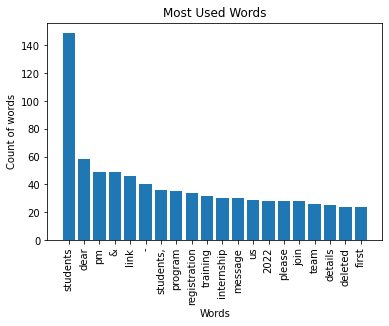

In [54]:
plt.bar(x[0],x[1])
plt.xticks(rotation='vertical')
plt.xlabel("Words")
plt.ylabel("Count of words")
plt.title("Most Used Words")
plt.show

#### WorldCloud

In [55]:
!pip install wordcloud

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

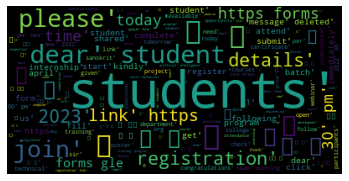

In [57]:
#text = temp['message'].values 
text=words
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Analysis

#### Emoji analysis

In [58]:
!pip install emoji

In [59]:
import emoji

In [60]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [61]:
emojis

['👆',
 '👆',
 '📌',
 '🌞',
 '🌞',
 '💥',
 '💥',
 '💐',
 '💐',
 '💐',
 '👍',
 '👍',
 '👍',
 '🏻',
 '💐',
 '💥',
 '👌',
 '👌',
 '🎉',
 '🎉',
 '👍',
 '👍',
 '🏻',
 '👏',
 '👍',
 '💐',
 '💐',
 '💐',
 '👌',
 '👏',
 '👏',
 '👌',
 '👏',
 '👏',
 '💥',
 '💥',
 '👆',
 '👍',
 '👍',
 '🎯',
 '🎯',
 '👆',
 '👆',
 '👆',
 '🏻',
 '👆',
 '👆',
 '🏻',
 '🙏',
 '👆',
 '👍',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '🥳',
 '💐',
 '💐',
 '💐',
 '💐',
 '🥳',
 '💐',
 '💐',
 '💐',
 '💐',
 '🥳',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '🥳',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '💐',
 '👆',
 '🏻',
 '💐',
 '💐',
 '💐',
 '💐',
 '👆',
 '👆',
 '💐',
 '💐',
 '💐',
 '💐',
 '📍',
 '📍',
 '📍',
 '📍',
 '⭕',
 '🙏',
 '🏻',
 '🙏',
 '🏻',
 '🙏',
 '🏻',
 '🎉',
 '🎊',
 '🌹',
 '😊',
 '📍',
 '📍',
 '📍',
 '📍',
 '👇',
 '👆',
 '👆',
 '👆',
 '✨',
 '🤩',
 '🔥',
 '🥳',
 '📅',
 '📍',
 '🕐',
 '🥳',
 '😊',
 '🙏',
 '👆',
 '👆']

In [62]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,💐,71
1,👆,17
2,👍,9
3,📍,9
4,🏻,8
5,🥳,6
6,💥,5
7,👏,5
8,🙏,5
9,👌,4


In [63]:
pd.DataFrame(Counter(emojis).most_common(5))

,0,1
0,💐,71
1,👆,17
2,👍,9
3,📍,9
4,🏻,8


#### Time series analysis

#### A)Monthly Analysis

In [64]:
temp['month_num']=temp['date'].dt.month

In [65]:
timeline=temp.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2022,9,September,6
1,2022,10,October,10
2,2022,11,November,83
3,2022,12,December,40
4,2023,1,January,45
5,2023,2,February,71
6,2023,3,March,56
7,2023,4,April,75


In [66]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [67]:
timeline['time']=time

In [68]:
timeline


,year,month_num,month,message,time
0,2022,9,September,6,September-2022
1,2022,10,October,10,October-2022
2,2022,11,November,83,November-2022
3,2022,12,December,40,December-2022
4,2023,1,January,45,January-2023
5,2023,2,February,71,February-2023
6,2023,3,March,56,March-2023
7,2023,4,April,75,April-2023


<function matplotlib.pyplot.show(close=None, block=None)>

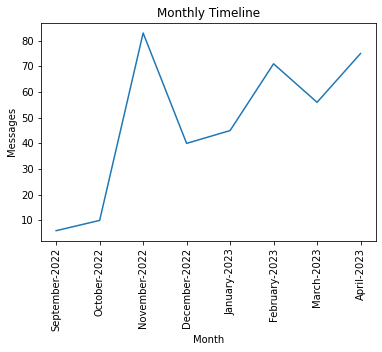

<Figure size 1296x720 with 0 Axes>

In [69]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.xlabel("Month")
plt.ylabel("Messages")
plt.title("Monthly Timeline")
plt.figure(figsize=(18,10))
plt.show

In [70]:
temp

,date,user,message,year,month,day,hour,minute,month_num
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...,2022,September,23,15,28,9
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...,2022,September,25,14,42,9
6,2022-09-26 16:17:00,Arvind Jagtap VP,*Greetings from EC-Council !* \n*Join us for ...,2022,September,26,16,17,9
7,2022-09-27 13:24:00,Rohini Naik Ma'am,Samiksha Pawar\nVedant Kulkarni\nSujay Shinde\...,2022,September,27,13,24,9
8,2022-09-27 13:25:00,Shendage Sir,Follow this link to join my WhatsApp group ht...,2022,September,27,13,25,9
...,...,...,...,...,...,...,...,...,...
536,2023-04-26 14:00:00,Ghorpade Sir,https://internship.aicte-india.org/recentlypos...,2023,April,26,14,0,4
537,2023-04-26 14:00:00,Ghorpade Sir,https://easyshiksha.com/online_courses/interns...,2023,April,26,14,0,4
538,2023-04-26 14:00:00,Ghorpade Sir,https://caddeskindia.com/online-training/cours...,2023,April,26,14,0,4
539,2023-04-26 15:06:00,Rohini Naik Ma'am,"Dear Students,\n\nAudit Course 6 Quiz has been...",2023,April,26,15,6,4


#### B) Daily Analysis

In [71]:
temp['only_date']=temp['date'].dt.date

In [72]:
Daily_Timeline=temp.groupby('only_date').count()['message'].reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

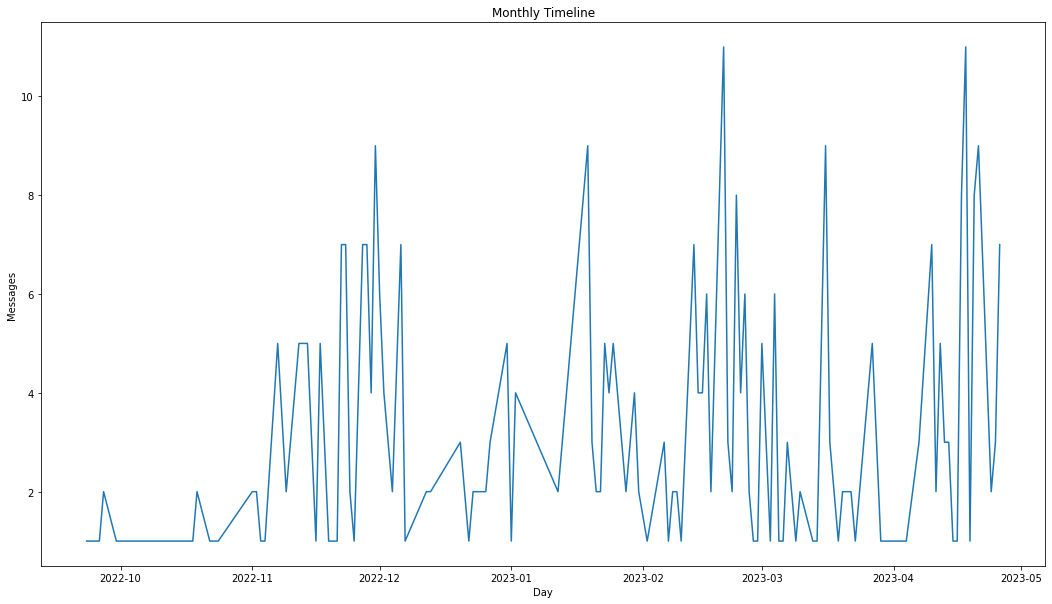

In [73]:
plt.figure(figsize=(18,10))

plt.plot(Daily_Timeline['only_date'],Daily_Timeline['message'])
plt.xlabel("Day")
plt.ylabel("Messages")
plt.title("Monthly Timeline")
plt.show


#### Weekly Activity map 

In [74]:
temp.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...,2022,September,23,15,28,9,2022-09-23
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...,2022,September,25,14,42,9,2022-09-25
6,2022-09-26 16:17:00,Arvind Jagtap VP,*Greetings from EC-Council !* \n*Join us for ...,2022,September,26,16,17,9,2022-09-26
7,2022-09-27 13:24:00,Rohini Naik Ma'am,Samiksha Pawar\nVedant Kulkarni\nSujay Shinde\...,2022,September,27,13,24,9,2022-09-27
8,2022-09-27 13:25:00,Shendage Sir,Follow this link to join my WhatsApp group ht...,2022,September,27,13,25,9,2022-09-27


In [75]:
temp['day_name']=temp['date'].dt.day_name()

In [76]:
temp['day_name'].value_counts()

Monday       85
Tuesday      76
Thursday     66
Wednesday    64
Friday       43
Saturday     33
Sunday       19
Name: day_name, dtype: int64

In [77]:
period=[]
for hour in temp[['day_name','hour']]['hour']:
    if hour==23:
        
        period.append(str(hour)+"-"+str('00'))
    elif hour==0:
            
        period.append(str('00')+"-"+str(hour+1)) 
    else:
        period.append(str(hour)+"-"+str(hour+1)) 
            

In [78]:
temp['period']=period

In [79]:
temp.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...,2022,September,23,15,28,9,2022-09-23,Friday,15-16
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...,2022,September,25,14,42,9,2022-09-25,Sunday,14-15
6,2022-09-26 16:17:00,Arvind Jagtap VP,*Greetings from EC-Council !* \n*Join us for ...,2022,September,26,16,17,9,2022-09-26,Monday,16-17
7,2022-09-27 13:24:00,Rohini Naik Ma'am,Samiksha Pawar\nVedant Kulkarni\nSujay Shinde\...,2022,September,27,13,24,9,2022-09-27,Tuesday,13-14
8,2022-09-27 13:25:00,Shendage Sir,Follow this link to join my WhatsApp group ht...,2022,September,27,13,25,9,2022-09-27,Tuesday,13-14


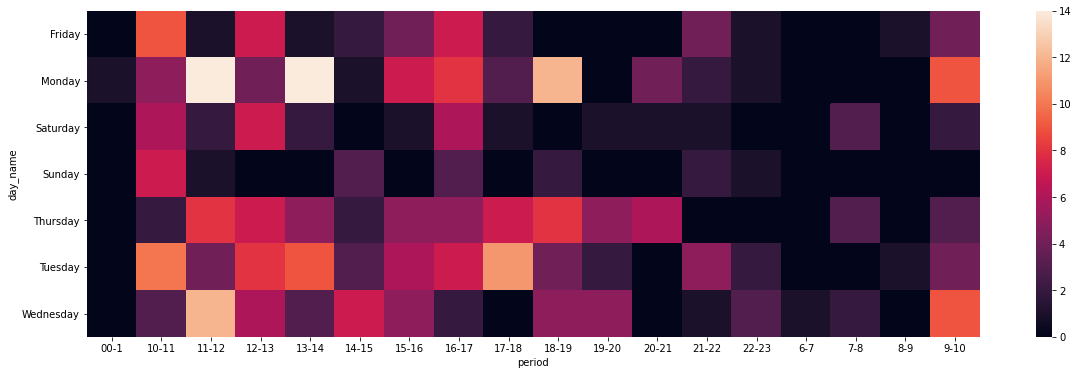

In [80]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(temp.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

### Sentiment Analyzer

In [81]:
!pip install nltk

In [82]:
temp

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...,2022,September,23,15,28,9,2022-09-23,Friday,15-16
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...,2022,September,25,14,42,9,2022-09-25,Sunday,14-15
6,2022-09-26 16:17:00,Arvind Jagtap VP,*Greetings from EC-Council !* \n*Join us for ...,2022,September,26,16,17,9,2022-09-26,Monday,16-17
7,2022-09-27 13:24:00,Rohini Naik Ma'am,Samiksha Pawar\nVedant Kulkarni\nSujay Shinde\...,2022,September,27,13,24,9,2022-09-27,Tuesday,13-14
8,2022-09-27 13:25:00,Shendage Sir,Follow this link to join my WhatsApp group ht...,2022,September,27,13,25,9,2022-09-27,Tuesday,13-14
...,...,...,...,...,...,...,...,...,...,...,...,...
536,2023-04-26 14:00:00,Ghorpade Sir,https://internship.aicte-india.org/recentlypos...,2023,April,26,14,0,4,2023-04-26,Wednesday,14-15
537,2023-04-26 14:00:00,Ghorpade Sir,https://easyshiksha.com/online_courses/interns...,2023,April,26,14,0,4,2023-04-26,Wednesday,14-15
538,2023-04-26 14:00:00,Ghorpade Sir,https://caddeskindia.com/online-training/cours...,2023,April,26,14,0,4,2023-04-26,Wednesday,14-15
539,2023-04-26 15:06:00,Rohini Naik Ma'am,"Dear Students,\n\nAudit Course 6 Quiz has been...",2023,April,26,15,6,4,2023-04-26,Wednesday,15-16


In [83]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [84]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()


In [85]:
temp['positive']=[sentiments.polarity_scores(i)['pos'] for i in temp['message'] ]
temp['negative']=[sentiments.polarity_scores(i)['neg'] for i in temp['message'] ]
temp['neutral']=[sentiments.polarity_scores(i)['neu'] for i in temp['message'] ]

In [90]:
temp

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period,positive,negative,neutral
3,2022-09-23 15:28:00,Shendage Sir,Those who are interested plz subject your app...,2022,September,23,15,28,9,2022-09-23,Friday,15-16,0.308,0.000,0.692
4,2022-09-25 14:42:00,Arvind Jagtap VP,*Greetings from Sandip University*\n\nSandip ...,2022,September,25,14,42,9,2022-09-25,Sunday,14-15,0.213,0.009,0.778
6,2022-09-26 16:17:00,Arvind Jagtap VP,*Greetings from EC-Council !* \n*Join us for ...,2022,September,26,16,17,9,2022-09-26,Monday,16-17,0.155,0.000,0.845
7,2022-09-27 13:24:00,Rohini Naik Ma'am,Samiksha Pawar\nVedant Kulkarni\nSujay Shinde\...,2022,September,27,13,24,9,2022-09-27,Tuesday,13-14,0.000,0.000,1.000
8,2022-09-27 13:25:00,Shendage Sir,Follow this link to join my WhatsApp group ht...,2022,September,27,13,25,9,2022-09-27,Tuesday,13-14,0.216,0.000,0.784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,2023-04-26 14:00:00,Ghorpade Sir,https://internship.aicte-india.org/recentlypos...,2023,April,26,14,0,4,2023-04-26,Wednesday,14-15,0.000,0.000,1.000
537,2023-04-26 14:00:00,Ghorpade Sir,https://easyshiksha.com/online_courses/interns...,2023,April,26,14,0,4,2023-04-26,Wednesday,14-15,0.000,0.000,1.000
538,2023-04-26 14:00:00,Ghorpade Sir,https://caddeskindia.com/online-training/cours...,2023,April,26,14,0,4,2023-04-26,Wednesday,14-15,0.000,0.000,1.000
539,2023-04-26 15:06:00,Rohini Naik Ma'am,"Dear Students,\n\nAudit Course 6 Quiz has been...",2023,April,26,15,6,4,2023-04-26,Wednesday,15-16,0.151,0.000,0.849


#### Sentiment Analysis of chats

In [86]:
x=sum(temp['positive'])
y=sum(temp['negative'])
z=sum(temp['neutral'])
def score(a,b,c):
    if(a>b)and(a>c):
        print("Positive")
    if(b>a)and(b>c):
        print("Negative")
    if(c>b)and(c>a):
        print("Neutral")
score(x,y,z)     

Neutral


#### Graph for positive messages

<function matplotlib.pyplot.show(close=None, block=None)>

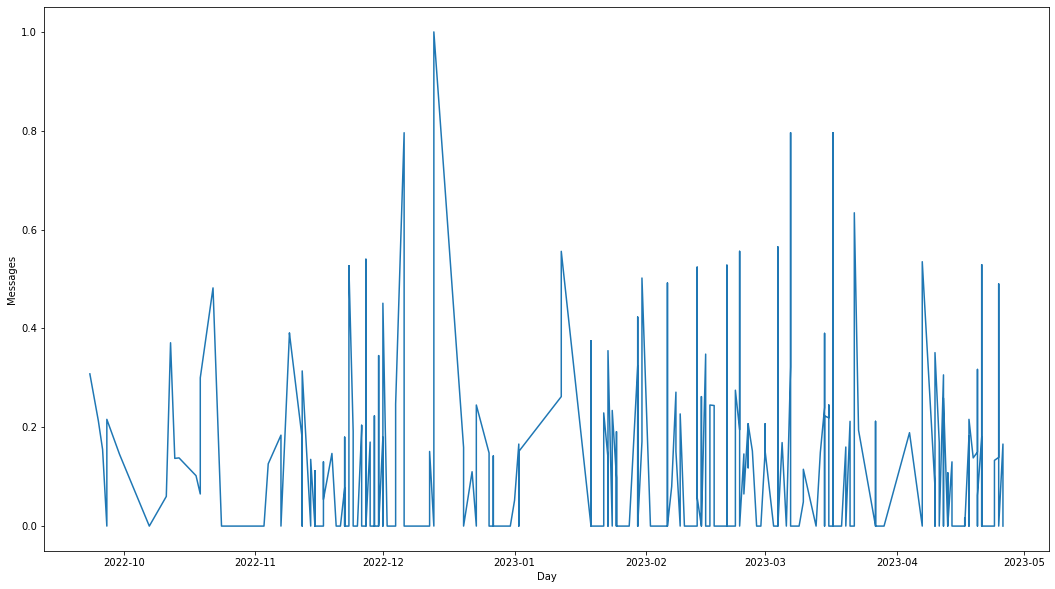

In [87]:
plt.figure(figsize=(18,10))

plt.plot(temp['only_date'],temp['positive'])
plt.xlabel("Day")
plt.ylabel("Messages")

plt.show

#### Graph for negative messages

<function matplotlib.pyplot.show(close=None, block=None)>

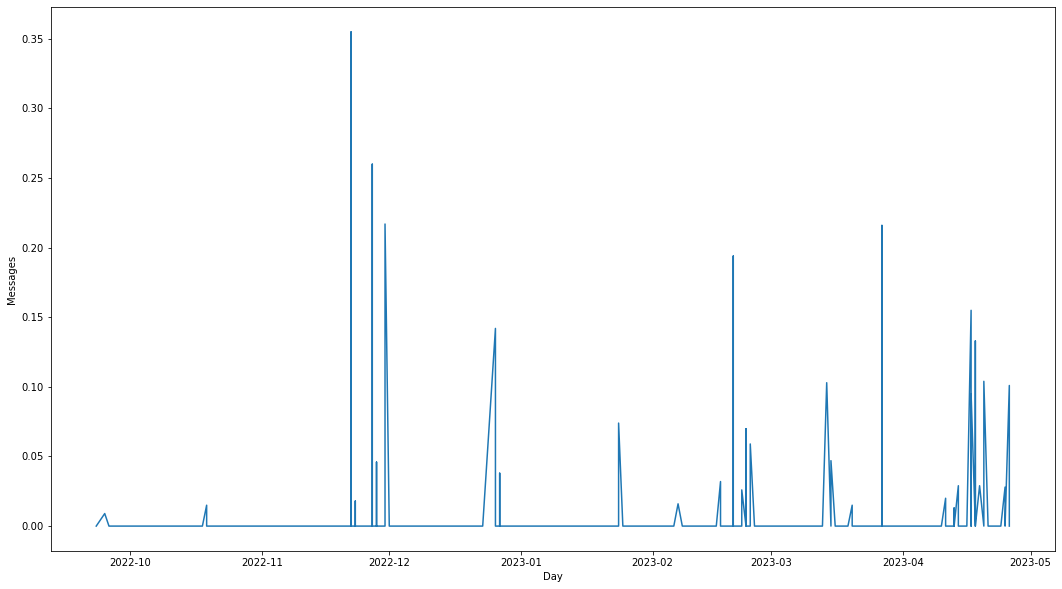

In [88]:
plt.figure(figsize=(18,10))

plt.plot(temp['only_date'],temp['negative'])
plt.xlabel("Day")
plt.ylabel("Messages")

plt.show

#### Graph for neutral messages

<function matplotlib.pyplot.show(close=None, block=None)>

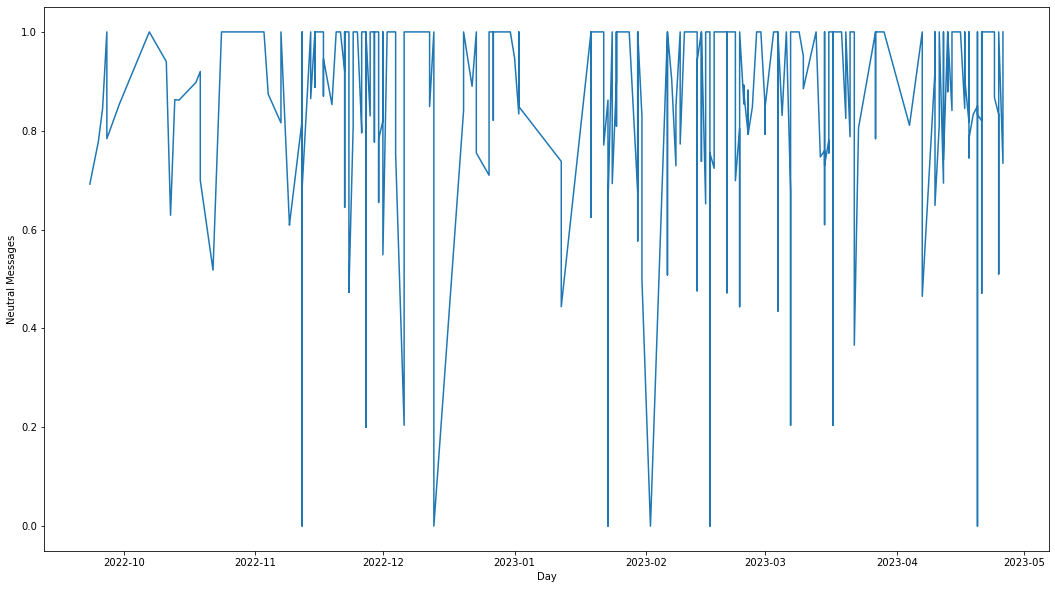

In [89]:
plt.figure(figsize=(18,10))

plt.plot(temp['only_date'],temp['neutral'])
plt.xlabel("Day")
plt.ylabel("Neutral Messages")

plt.show